# Importing necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
#plotting the best parameters
import matplotlib.patches as mpatches


from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.metrics import roc_curve
import numpy as np

# Reading the collected dataset

In [2]:
path = '/Ml files/suicide ideation/Suicide Ideation Detection using natural Language Processing'

In [3]:
df = pd.read_csv(path + '/dataset/cleaned_df.csv')

# Suffling the dataset

In [4]:
df =  shuffle(df).reset_index(drop=True)
df.head()

,text,label,cleaned_text
0,i hate when people assume i’m mad or bitter be...,1,hate people assume im mad bitter choose discon...
1,will it also end with me telling the love of m...,0,also end tell love life isnt enough room u flo...
2,you dont hear about serial killers anymore bec...,0,dont hear serial killer anymore nowadays every...
3,i literally do not want to live anymore,0,literally want live anymore
4,imagine not wanting to kill yourself i serious...,1,imagine want kill seriously cant relate x


# Tokenizing the cleaned text

In [5]:
#removing shortwords
df.cleaned_text=df['cleaned_text'].astype(str)
tokenized_df=df['cleaned_text'].apply(lambda x: x.split())
tokenized_df.head(5)

0    [hate, people, assume, im, mad, bitter, choose...
1    [also, end, tell, love, life, isnt, enough, ro...
2    [dont, hear, serial, killer, anymore, nowadays...
3                     [literally, want, live, anymore]
4    [imagine, want, kill, seriously, cant, relate, x]
Name: cleaned_text, dtype: object

In [6]:
df['cleaned_text']=df['cleaned_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head(5)

,text,label,cleaned_text
0,i hate when people assume i’m mad or bitter be...,1,hate people assume bitter choose disconnect ac...
1,will it also end with me telling the love of m...,0,also tell love life isnt enough room float watch
2,you dont hear about serial killers anymore bec...,0,dont hear serial killer anymore nowadays every...
3,i literally do not want to live anymore,0,literally want live anymore
4,imagine not wanting to kill yourself i serious...,1,imagine want kill seriously cant relate


# Feature extraction with Count Vectorizer

In [7]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=15000, min_df=5,ngram_range=(1,1))
text_counts = tfidf.fit_transform(df['cleaned_text'].values.astype('U'))

# Train test split
80% as training data and 20% as testing data

In [8]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)

In [9]:
print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (39342, 8538)
x_test:  (9836, 8538)
y_train:  (39342,)
y_test:  (9836,)


# Confusion Matrix

In [10]:
def plot_cm(y_true, y_pred,filename, figsize=(8,8)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d' % (p, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=['non-suicidal', 'suicidal'], columns=['non-suicidal', 'suicidal'])
    sns.set(font_scale=2) # Adjust to fit
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "Blues", annot=annot, fmt='', ax=ax)
    plt.ylabel('True label',fontsize=18)
    plt.xlabel('Predicted label',fontsize=18)
    plt.xticks( rotation=0, weight = 'bold')
    plt.yticks( rotation=90, weight = 'bold')
    plt.show()
    plt.close()

# Training the models

In [11]:
def Model(model,name):
    model.fit(X_train,y_train)
    cross = cross_val_score(model, X, y, cv = 10, n_jobs = -1,scoring = 'accuracy')
    print("Cross Validation score = ",cross)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    print('{} Trainng Score {}\n'.format(name,model_train_score))
    print('{} Testing Score {}\n'.format(name,model_test_score))
    plot_cm(y_test, prediction,name)
    return cross

## MultinomialNB

Cross Validation score =  [0.84546564 0.85685238 0.85542904 0.84160228 0.84851566 0.850549
 0.84485563 0.8546157  0.85641651 0.84563758]
Multinomial Naive Bayes Trainng Score 0.8891769610085913

Multinomial Naive Bayes Testing Score 0.8567507116714111



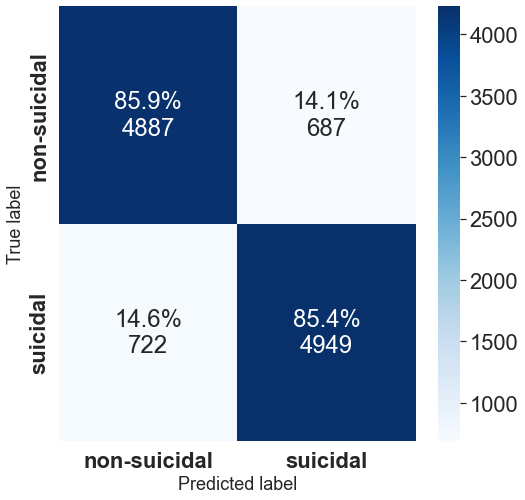

In [12]:

MNB = MultinomialNB(alpha=0.15,fit_prior=True, class_prior=None)
MNB_model = Model(MNB,"Multinomial Naive Bayes")

## SGD classifier

Cross Validation score =  [0.89894266 0.90138268 0.8944693  0.88430256 0.89711265 0.89548597
 0.89304595 0.90138268 0.89770185 0.89993899]
SGD classifier Trainng Score 0.9142138172944945

SGD classifier Testing Score 0.8992476616510777



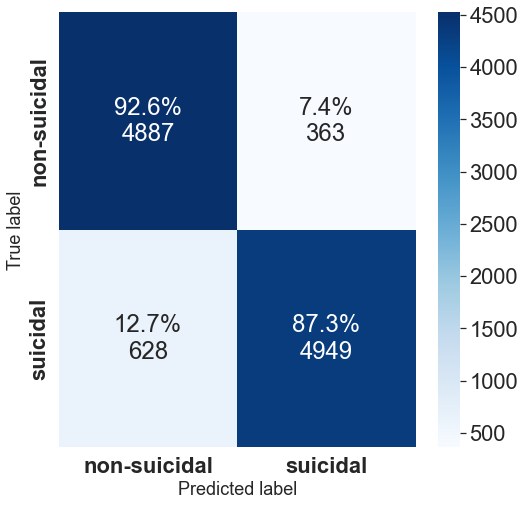

In [13]:

SGD = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, random_state=42, max_iter=200, tol=None)
SGD_model = Model(SGD,"SGD classifier")

## Logistic Regression

Cross Validation score =  [0.90138268 0.90178935 0.89365596 0.88816592 0.89914599 0.89934933
 0.89324929 0.90626271 0.89871873 0.903193  ]
Logistic Regression classifier Trainng Score 0.9160693406537542

Logistic Regression classifier Testing Score 0.9008743391622611



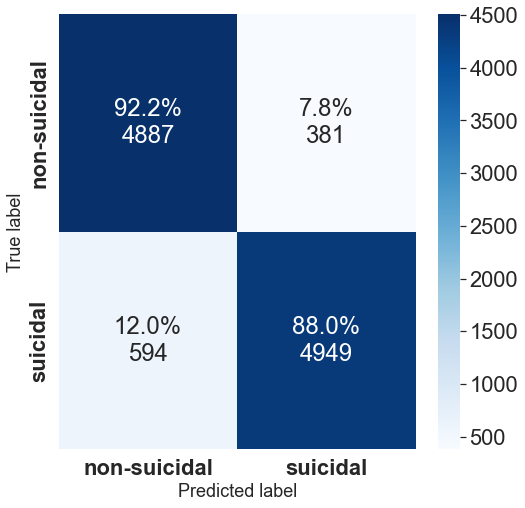

In [14]:

LR = LogisticRegression(penalty='l2',multi_class='ovr',solver='liblinear',C=0.8,random_state=42,tol=0.0001,max_iter=200)
LR_model = Model(LR,"Logistic Regression classifier")

## Random Forest Classifier

Cross Validation score =  [0.93371289 0.9302562  0.93188288 0.93086621 0.9255795  0.93269622
 0.93452623 0.94123627 0.93593655 0.93390279]
Randomforrenst classifier Trainng Score 0.9982461491535763

Randomforrenst classifier Testing Score 0.9308662057747051



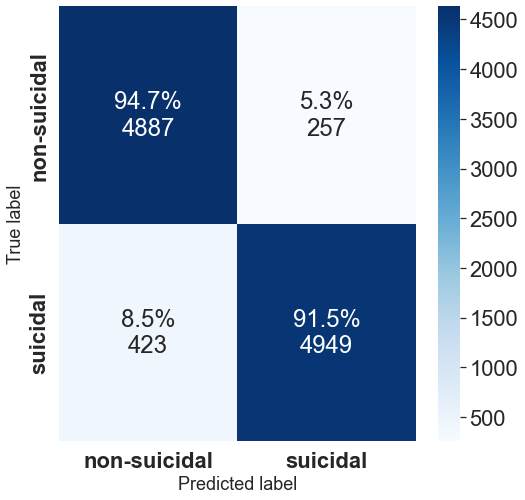

In [15]:
RF = RandomForestClassifier(n_estimators=200,criterion ='entropy')
RF_model = Model(RF,"Randomforrenst classifier")

## SVC

Cross Validation score =  [0.93655958 0.94265962 0.93574624 0.92354616 0.93289955 0.93411956
 0.9296462  0.94082961 0.93532642 0.93430954]
Support Vector classifier Trainng Score 0.982919017843526

Support Vector classifier Testing Score 0.9317812118747458



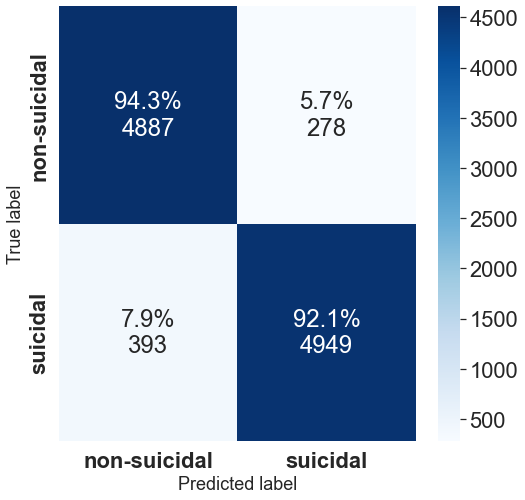

In [16]:
SVC = SVC(random_state=42)
SVC_model = Model(SVC,"Support Vector classifier")

## XGB

In [17]:
!pip install xgboost

Cross Validation score =  [0.89812932 0.8904026  0.88674258 0.87555917 0.88470923 0.88999593
 0.89202928 0.89345262 0.89404108 0.8972951 ]
XGB classifier Trainng Score 0.9120786945249352

XGB classifier Testing Score 0.8897925986173241



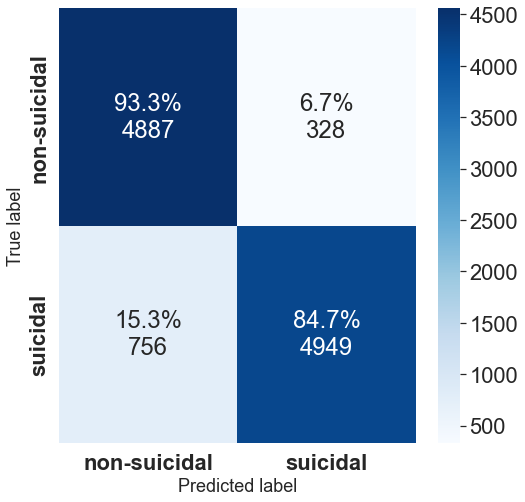

In [18]:
import xgboost as xgb
XGB = xgb.XGBClassifier(n_jobs=1)
XGB_model = Model(XGB,"XGB classifier")

## Passive Aggressive Classifier

Cross Validation score =  [0.89812932 0.90382269 0.89711265 0.89670598 0.8950793  0.89141928
 0.89467263 0.89548597 0.89953224 0.88977019]
Passive Aggressive Classifier Trainng Score 0.9702099537390066

Passive Aggressive Classifier Testing Score 0.8893859292395283



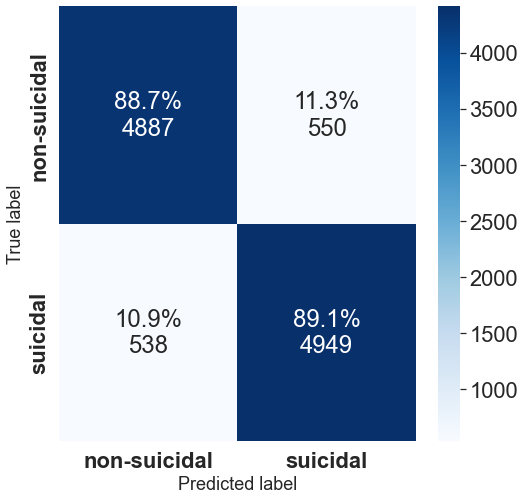

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAG = PassiveAggressiveClassifier(random_state=42,max_iter=500,tol=None)
PAG_model = Model(PAG,"Passive Aggressive Classifier")

# Performance comparison

In [24]:
MLA = {
    'MNB' : MNB,
    'SGD' : SGD,
    'LR' : LR,
    'RF' : RF,
    'SVC' : SVC,
    'XGB' : XGB,
    'PAG' : PAG,
}

In [25]:
columns = []
compare = pd.DataFrame(columns = columns)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=4
row_index = 0
for name,alg in MLA.items():
    MLA_name = name
    predicted = alg.predict(X_test)
    auc_score = roc_auc_score(y_test, predicted)
    micro_averaged_recall = recall_score(y_test, predicted, average = 'macro')
    macro_averaged_f1 = f1_score(y_test, predicted, average = 'macro')
    precisions =precision_score(y_test, predicted, average = 'micro')
    
    compare.loc[row_index,'Name'] = MLA_name
    compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    compare.loc[row_index, 'AUC'] = auc_score
    compare.loc[row_index, 'Precision'] = precisions
    compare.loc[row_index, 'Recall'] = micro_averaged_recall
    compare.loc[row_index, 'F1 Score'] = macro_averaged_f1
    row_index+=1
    
compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
compare

,Name,Test Accuracy,AUC,Precision,Recall,F1 Score
4,SVC,0.9318,0.931852,0.931781,0.931852,0.931779
3,RF,0.9309,0.930970,0.930866,0.930970,0.930858
2,LR,0.9009,0.901007,0.900874,0.901007,0.900851
1,SGD,0.8992,0.899413,0.899248,0.899413,0.899205
5,XGB,0.8898,0.890063,0.889793,0.890063,0.889640
6,PAG,0.8894,0.889374,0.889386,0.889374,0.889380
0,MNB,0.8568,0.856767,0.856751,0.856767,0.856750


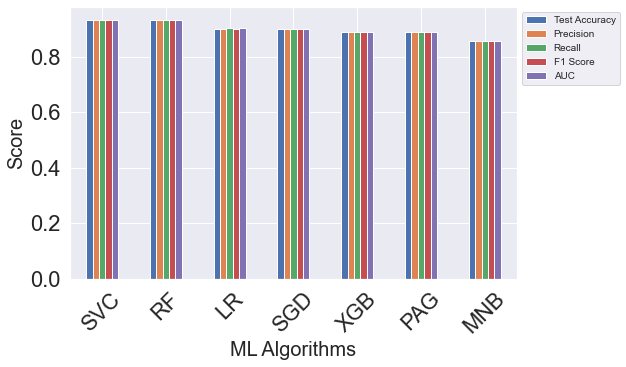

In [27]:
#plot comaparison 
compare.plot(x="Name", y=["Test Accuracy", "Precision", "Recall", "F1 Score", "AUC"], kind="bar",figsize=(8, 5))
plt.xlabel('ML Algorithms',fontsize=20)
plt.ylabel('Score',fontsize=20)
plt.xticks(rotation = 45)
plt.legend(loc = 2, bbox_to_anchor = (1,1),prop={'size': 10})
plt.show()

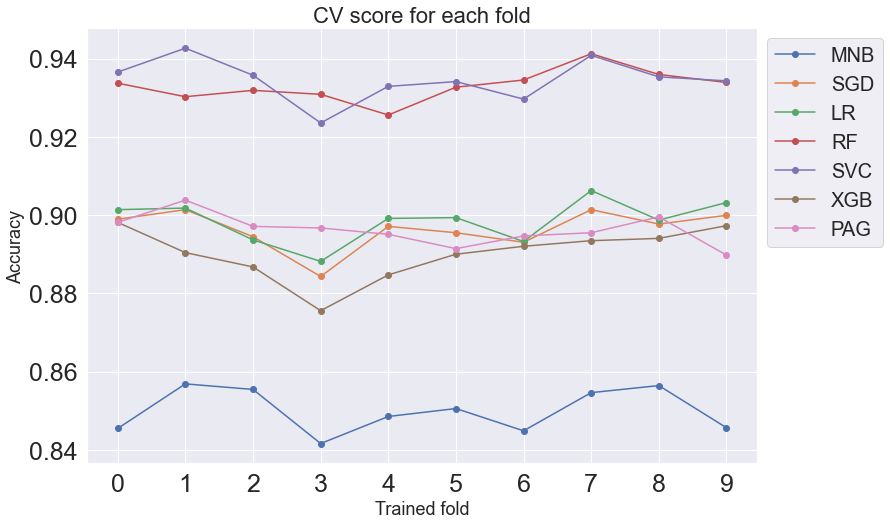

In [28]:
plt.figure(figsize=(12,8))
n_folds=10
plt.plot(MNB_model,marker='o')
plt.plot(SGD_model,marker='o')
plt.plot(LR_model,marker='o')
plt.plot(RF_model,marker='o')
plt.plot(SVC_model,marker='o')
plt.plot(XGB_model,marker='o')
plt.plot(PAG_model,marker='o')
plt.title('CV score for each fold',fontsize=22)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Trained fold',fontsize=18)
plt.xticks([k for k in range(n_folds)])
plt.tick_params(axis='x',rotation=0,labelsize=25)
plt.tick_params(axis='y',rotation=0,labelsize=25)
plt.legend(['MNB', 'SGD', 'LR', 'RF', 'SVC', 'XGB', 'PAG', ], loc=2,bbox_to_anchor = (1,1), prop={'size': 20})
plt.show()